# Imports

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

# import keras
# from keras.callbacks import ReduceLROnPlateau
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
# from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
github_csv_url = r"C:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/completeAudioSetdf.csv"

data_path = pd.read_csv(github_csv_url)



## Data Augmentation

### Data Aug Function

In [14]:
# NOISE INJECTION
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# TIME STRETCHING
def stretch(data, rate):
    return librosa.effects.time_stretch(data, rate=0.8)

# TIME SHIFTING
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high =5)*35000)
    return np.roll(data, shift_range)

# PITCH SHIFTING
def pitch(data):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=0.7)


### Testing the techniques to see which is better to use

In [4]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

Normal Audio

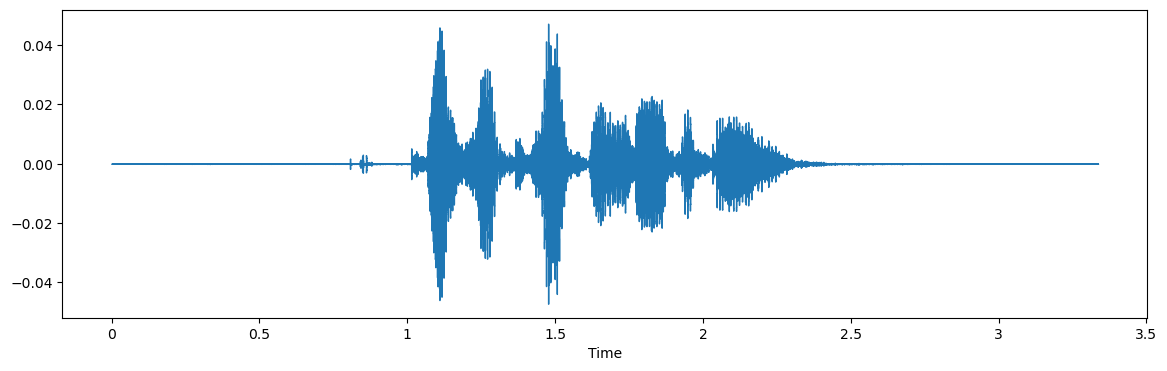

In [5]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

Noise Injection

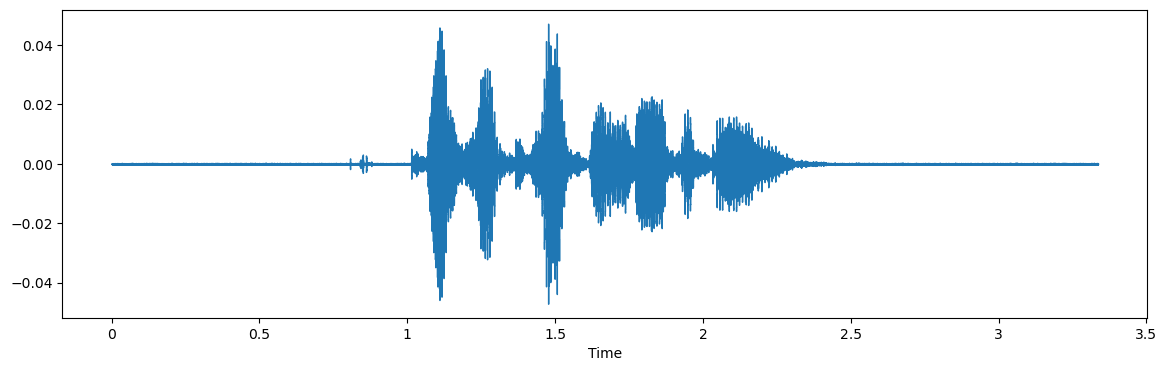

In [6]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Time Stretching

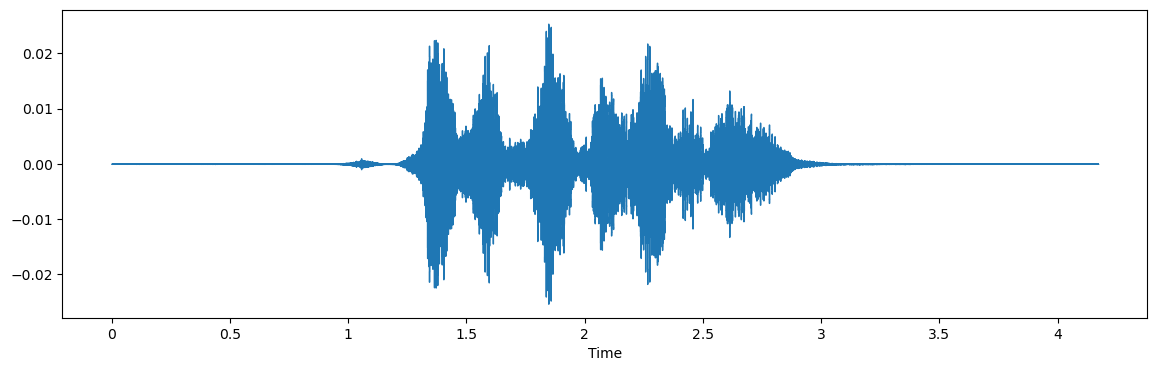

In [16]:
x = stretch(data, rate=0.8)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Time Shifting

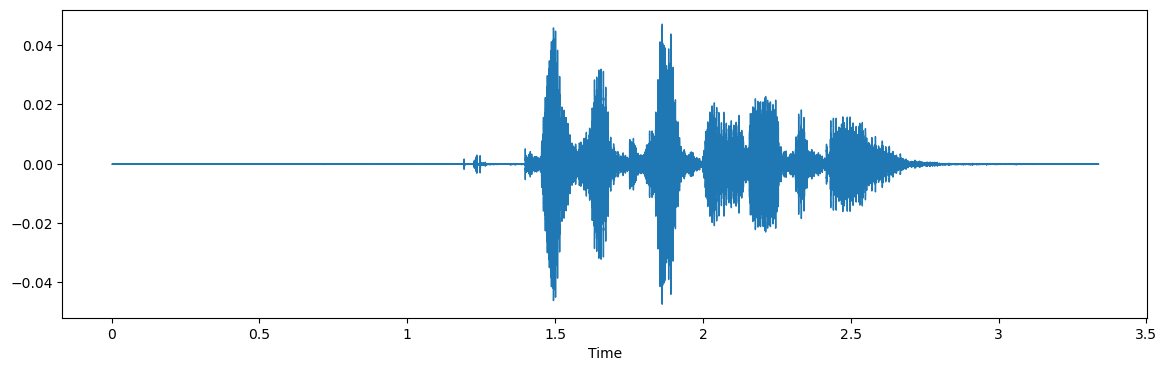

In [8]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Pitch Shifting

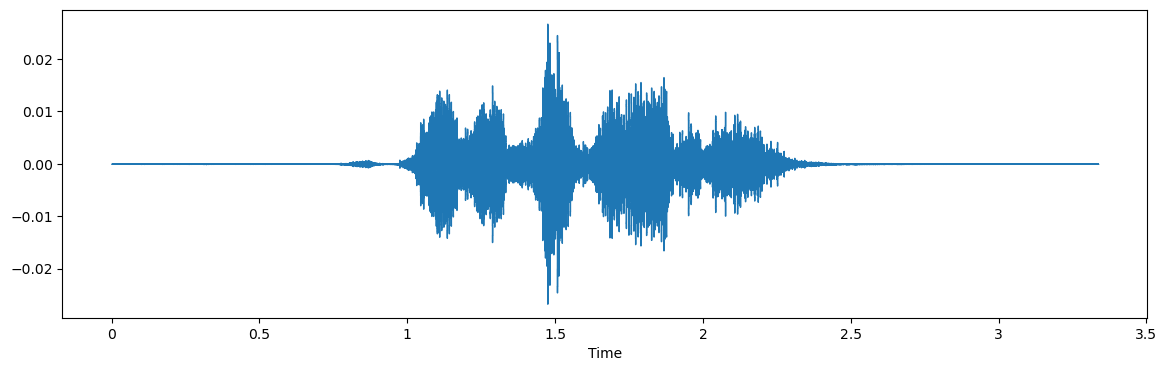

In [11]:
x = pitch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

We decide using noise, time stretching and pitching shifting